In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [27]:
# 데이터 준비 
# cifar10 


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)

 # 1차원만 원핫인코딩을 할수 있기 때문에 reshape해준다. 

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 1)


In [28]:
# 모델 만들기 

x = tf.keras.layers.Input(shape = (32,32,3))
h = tf.keras.layers.Conv2D(32, kernel_size = 5, padding = 'same',activation='relu')(x)
h = tf.keras.layers.MaxPooling2D()(h)
h = tf.keras.layers.Dropout(0.3)(h)
h = tf.keras.layers.Conv2D(64, kernel_size = 5, activation='relu')(h)
h = tf.keras.layers.MaxPooling2D()(h)
h = tf.keras.layers.Dropout(0.3)(h)

h = tf.keras.layers.Flatten()(h)
h = tf.keras.layers.Dense(120,activation='relu')(h)
h = tf.keras.layers.BatchNormalization()(h)
h = tf.keras.layers.Dropout(0.3)(h)
h = tf.keras.layers.Dense(84,activation='relu')(h)
h = tf.keras.layers.BatchNormalization()(h)
h = tf.keras.layers.Dropout(0.3)(h)
y = tf.keras.layers.Dense(10,activation='softmax')(h)

model = tf.keras.models.Model(x,y)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [35]:
# 학습

history = model.fit(x_train,y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7469 - loss: 0.7334
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7461 - loss: 0.7384
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7525 - loss: 0.7209
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7515 - loss: 0.7220
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7459 - loss: 0.7389
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7569 - loss: 0.7057
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7620 - loss: 0.7004
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7600 - loss: 0.6940
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7600 - loss: 0.6857
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7594 - loss: 0.6939
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7645 - loss: 0.6874
Epoch 12

In [37]:
import matplotlib.pyplot as plt

In [40]:
def plot_loss_accuracy(history, epochs):
    plt.figure(figsize=(12, 4))

    # 손실(loss) 그래프
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history.history['loss'], label='Training Loss')
    # plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도(accuracy) 그래프
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
    # plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

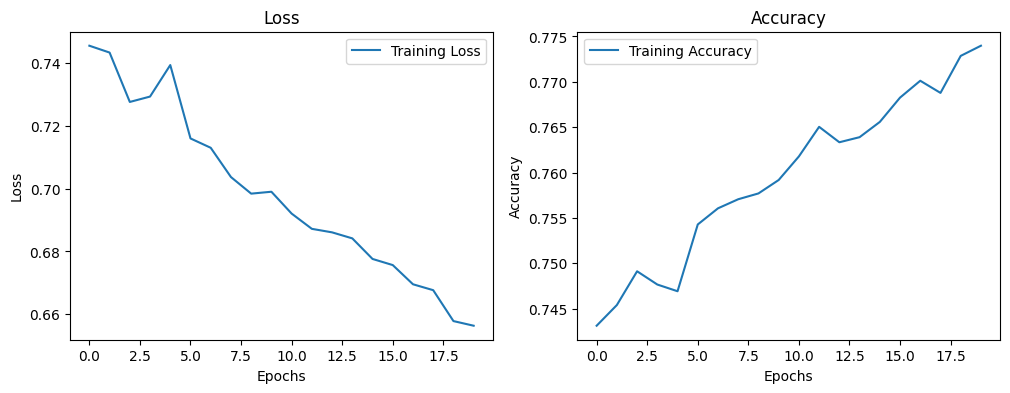

In [41]:
import matplotlib.pyplot as plt

plot_loss_accuracy(history, 20)

In [31]:
# 예측

prediction = model.predict(x_train[0:5])
pd.DataFrame(prediction).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.00,0.00,0.02,0.09,0.07,0.12,0.68,0.01,0.00,0.00
1,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.92
2,0.10,0.03,0.01,0.10,0.03,0.05,0.01,0.15,0.15,0.36
3,0.00,0.00,0.01,0.01,0.93,0.01,0.01,0.04,0.00,0.00
4,0.01,0.89,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.05


In [32]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [42]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7663 - loss: 0.6865


[0.6952278017997742, 0.76419997215271]